In [1]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


In [2]:
#Load the raw data
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Processing

In [3]:
#descriptive satistics
raw_data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
#Dropping Model due to large variance of types. Dropping registration because so many are yes
data = raw_data.drop(['Model'], axis=1)
data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [26]:
#Dealing with Missing Values
data.isnull().head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [27]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [28]:
data_no_mv = data.dropna(axis = 0) #allows me to delete missing vlaues. The 0 Axis takes away all the variables

In [29]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


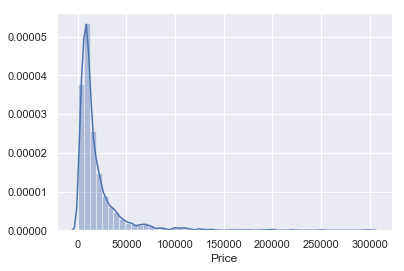

In [30]:
#Probbability distrbution function
sns.distplot(data_no_mv['Price'])

In [31]:
#taking the outliers out of Price variable
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


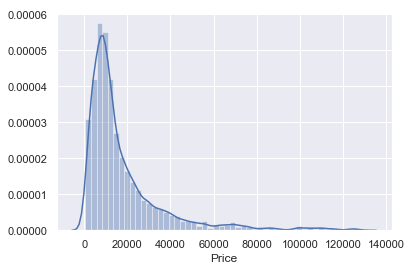

In [32]:
sns.distplot(data_1['Price'])

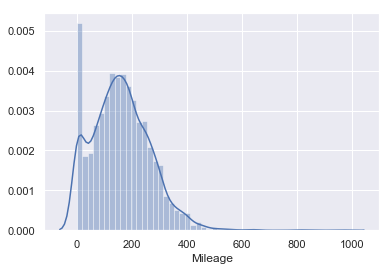

In [33]:
sns.distplot(data['Mileage'])

In [34]:
p = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<p] 
#Doing the same thing for Mileage

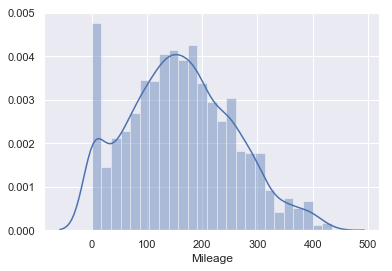

In [35]:
sns.distplot(data_2['Mileage'])

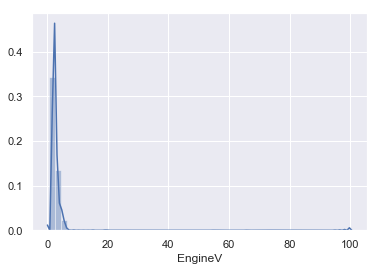

In [36]:
sns.distplot(data_2['EngineV'])

In [37]:
#Becasue values should be between 0.6 and 6.5 (Natrual Domain) There were incorrect entries
data_3 = data_2[data_2['EngineV']<6.5]

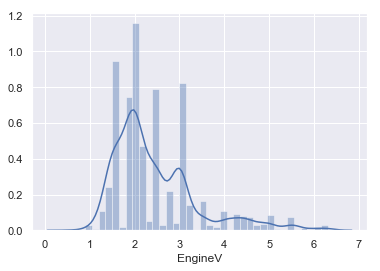

In [38]:
sns.distplot(data_3['EngineV'])

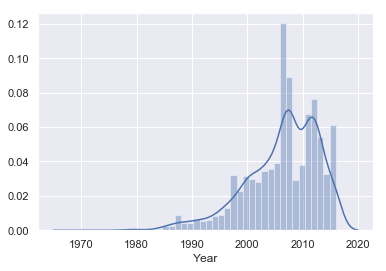

In [39]:
sns.distplot(data_3['Year'])

In [40]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
#Romoved the first percentile of observations to get rid of any older cars that would be outliers

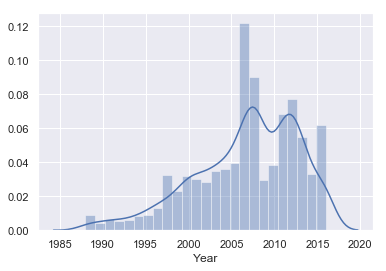

In [41]:
sns.distplot(data_4['Year'])

In [42]:
data_cleaned = data_4.reset_index(drop = True)

In [43]:
data_cleaned.describe(include = 'all')
#Final data ready to regress, over 250 observations were taken out

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Regression and OLS

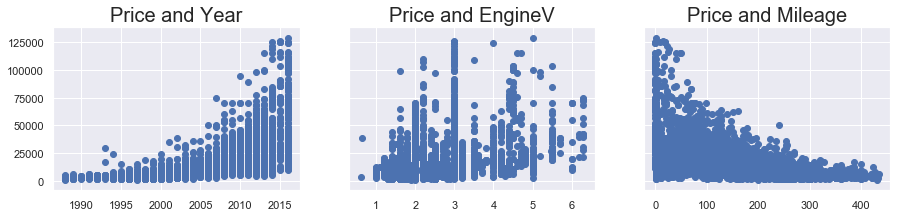

In [44]:
#checking for old assumptions

#Looking at the correlations
#Need to learn how to actually correlate the two
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year', fontsize = 20)
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV', fontsize = 20)
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage', fontsize = 20)


plt.show()

In [45]:
#Maybe a Linear Regression isnt the best option?
#Price is not normally distributed
#Log transformation is a good way to deal with this issue

In [46]:
#Creating a log variable on price(dependent varibale)
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


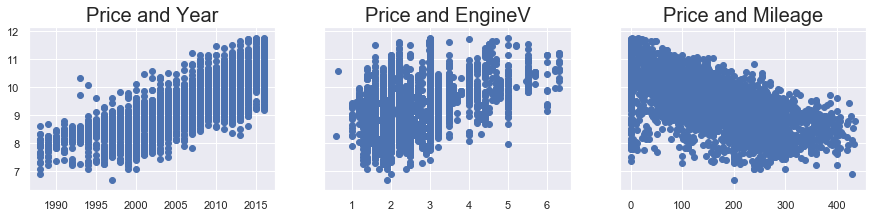

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year', fontsize = 20)
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV', fontsize = 20)
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Price and Mileage', fontsize = 20)


plt.show()

In [48]:
#Dropping price as a varible and keeping the log price
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [49]:
#check for endogeneity
#large sample size means that there is normality (central limit theorem)
#Zero mean done through intercept
#Homoskedasticity done through linear graphs (log transformation is a common fix  for heteroskedasticity)

In [50]:
#Autocorrelation (not logically applicable)


In [51]:
#Checking for multicollinearity
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [53]:
vif
#no firm consensus (5,6,10) cut off
# I will remove year becasue it is too correlative

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [54]:
#Drop Year
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [55]:
#Dummy Variables 
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [56]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [57]:
#Checking VIF of dummies without removing all the variables (This is a simple exercise not done normally)
data_mc_dummies = pd.get_dummies(data_no_multicollinearity)
data_mc_dummies.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [58]:
variables = data_mc_dummies[['Brand_Audi','Brand_BMW','Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_other', 'Body_sedan', 'Body_sedan', 'Body_vagon', 'Body_van', 'Body_crossover', 'Body_crossover', 'Registration_no', 'Registration_yes']]
#'Enigne Type_Diesel', 'Enigne Type_Gas', 'Enigne Type_Other', 'Enigne Type_Petrol' not working
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif
#It is clear that there is multicollineaity if you add all the dummy variables

C:\Users\MikeM\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,inf,Brand_Audi
1,inf,Brand_BMW
2,inf,Brand_Mercedes-Benz
3,inf,Brand_Mitsubishi
4,inf,Brand_Renault
5,inf,Brand_Toyota
6,inf,Brand_Volkswagen
7,2.285717,Body_other
8,inf,Body_sedan
9,inf,Body_sedan


In [59]:
#Reorder columns
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [60]:
#Manual use of cols to place log first
cols =['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [61]:
data_preprocessed = data_with_dummies[cols]

In [62]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [63]:
#declaring imputs and targets
targets =  data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [64]:
#scale the data
#import the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)


C:\Users\MikeM\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
inputs_scaled = scaler.transform(inputs)

C:\Users\MikeM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [66]:
#SCALED DUMMY VARIABLES KILLS ALL THEIR MEANING

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365 )

In [68]:
#Create the Regression (log linear model)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#checking model
y_hat = reg.predict(x_train)

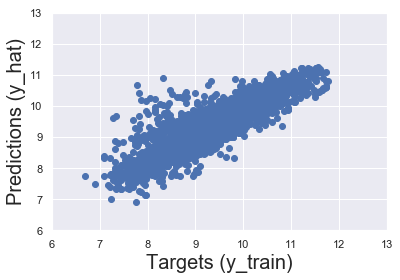

In [70]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',fontsize =20)
plt.ylabel('Predictions (y_hat)', fontsize = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

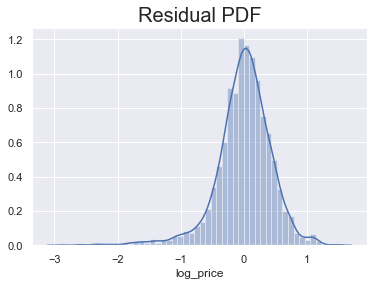

In [71]:
#residual plot
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=20)
#residuals must have normality, zeromean, and homoskedastic

In [72]:
reg.score(x_train, y_train)

0.744996578792662

In [73]:
x_train.shape

(3093, 17)

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [74]:
#quick early calculation of adjusted R^2(probably scrapped after modifications)
def early_adj_r2(x_train, y_train):
    r2 = reg.score(x_train,y_train)
    n =  x_train.shape[0]
    p =  x_train.shape[1]
    early_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return(early_adjusted_r2)

In [75]:
early_adj_r2(x_train, y_train)

0.7435868037811093

In [76]:
#finding  weights and bias
reg.intercept_, reg.coef_

(9.415239458021299,
 array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
        -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
        -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
        -0.14690868,  0.32047333]))

In [77]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['weights'] = reg.coef_
reg_summary
#quick summary table

,Features,weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [78]:
#finding the benchmarks for practice
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [79]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [80]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [81]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [82]:
#Testing
y_hat_test = reg.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

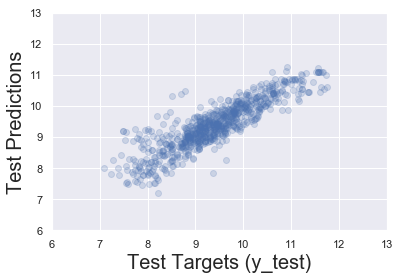

In [83]:
#plot test targets on train targets (ytest on yhat test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
#alpha allows to show concentration
plt.xlabel('Test Targets (y_test)', fontsize = 20)
plt.ylabel('Test Predictions',fontsize = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show


In [84]:
#Model good at predicting higher prices
#exercise to unconventionally look at data manually

In [85]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [91]:
df_pf['Target']= np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [92]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [93]:
y_test = y_test.reset_index(drop=True)
#dropping and resetting index


In [94]:
df_pf['Target']= np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [95]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
#mapping out residual

In [96]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target']*100)

In [97]:
df_pf.head()

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [98]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [99]:
#minimum difference is small and reall 

In [100]:
#looking at manual data. Pandas doesnt display everything
pd.options.display.max_rows = 999
#float to only 2 decimal places
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


In [101]:
#fialed predictions are higher than targets... We may be missing an important factor